In [10]:
# 📦 Step 1: Install required libraries (only run once)
!pip install tensorflow tensorflow_hub matplotlib pillow



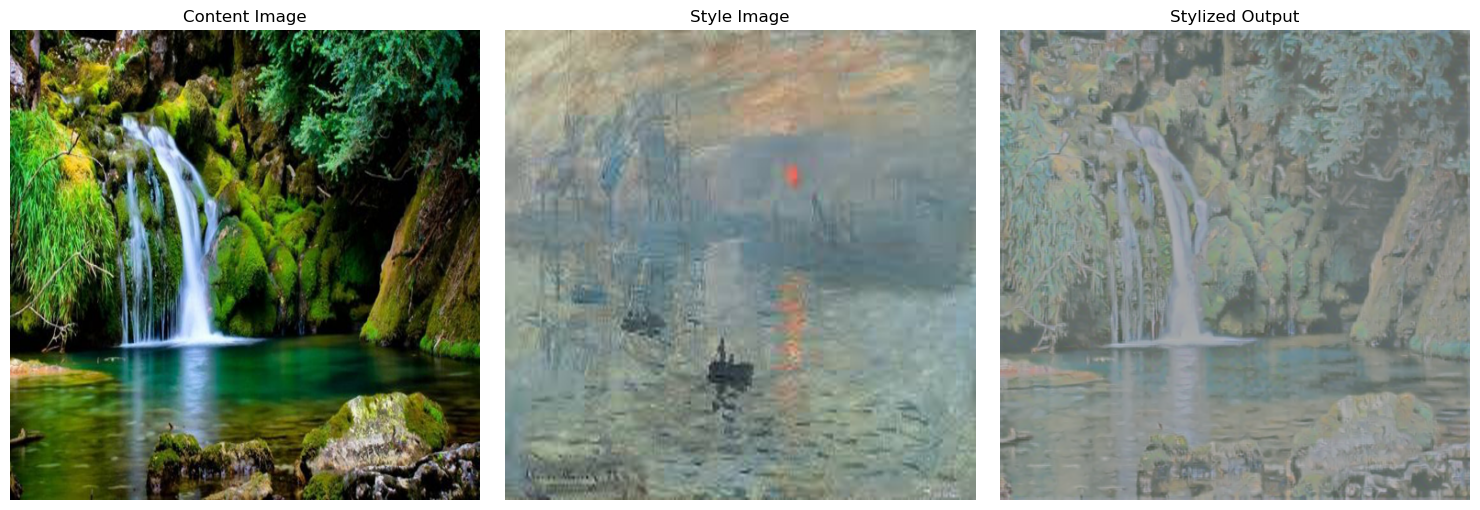

In [13]:
# 🧠 Step 2: Neural Style Transfer Code for .jpg images

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 🔧 Function to load and process image
def load_image(path, max_dim=512):
    img = Image.open(path).convert('RGB')
    img = img.resize((max_dim, max_dim))
    img = np.array(img) / 255.0
    img = img[tf.newaxis, :]  # Add batch dimension
    return tf.convert_to_tensor(img, dtype=tf.float32)

# 🖼️ Use your actual .jpg image filenames
content_path = "content.jpg"
style_path = "styled.jpg"

# Load the content and style images
content_image = load_image(content_path)
style_image = load_image(style_path)

# 🔄 Load style transfer model from TensorFlow Hub
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 🎨 Apply style
stylized_image = model(content_image, style_image)[0]

# 📷 Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(content_image[0])
plt.title("Content Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(style_image[0])
plt.title("Style Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(stylized_image[0])
plt.title("Stylized Output")
plt.axis('off')

plt.tight_layout()
plt.show()
